Stáhni si data ze souboru Life-Expectancy-Data-Updated.csv, která udávají průměrnou dobu života v jednotlivých zemích světa. Data pocházejí od Světové zdravotnické organizace (WHO) a Světové banky. Vytvoř regresní model, jehož úkolem bude zjistit, které faktory ovlivňují průměrnou délku života.

https://github.com/pesikj/PythonProDataScience/blob/c2c439db2b0ce9790f3ef4fe7ab989bf738b420f/domaci_ukoly/soubory_03/Life-Expectancy-Data-Updated.csv

- Vyber data pro jeden konkrétní rok (např. pro rok 2015).
- Vysvětlovanou proměnnou ve tvém modelu bude Life expectancy, což je průměrná délka života.
- Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec GDP_per_capita (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf. Dále si zobraz tabulku s využitím metody využitím modulu scipy a metody summary() a zjisti koeficient determinace.

Do modelu přidej následující sloupce:

- Schooling - průměrná délka studia (v letech),
- Incidents_HIV - nákazy virem HIV (počet případů na osobu)
- Diphtheria - procento populace očkované proti záškrtu,
- Polio - procento populace očkované proti dětské obrně,
- BMI - průměrný BMI index populace,
- Measles - procento populace očkované proti spalničkám.
U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

Sestav model z vybraných sloupců a proveď následující kroky:

- Formuluj hypotézu o normalitě reziduí a otestuj ji s využitím modulu scipy a metody summary(). Jaký je výsledek - mají rezidua normální rozdělení?
- Jaký je koeficient determinace výsledného modelu. Porovnej ho s koeficientem determinace, který vyšel z modelu, kde byl pouze hrubý domácí produkt. Jak se změnil? A co to znamená?
- Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce P>|t| a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?
#### Hypotézy a odpovědi na otázky, které jsou součástí zadání, prosím piš jako text v Jupyter notebooku nebo jako komentář ke zdrojovému kódu. Komentáře stačí stručné, nechceme článek, ale jde jen o to, abychom věděli, že je látka jasná.

Vyber data pro jeden konkrétní rok (např. pro rok 2015).

In [24]:
import pandas
data = pandas.read_csv("ukol_03-Life-Expectancy-Data-Updated.csv")

data2015 = data[data["Year"] == 2015]



Vysvětlovanou proměnnou ve tvém modelu bude Life expectancy, což je průměrná délka života.
Délku dožití určitě bude ovlivňovat bohatství země, které lze vyjádřit ve hrubém domácím produktu na hlavu. Začni s modelem, který má jako vysvětlující proměnnou sloupec GDP_per_capita (hrubý domácí produkt na hlavu v dolarech). Zobraz výsledek jako graf.

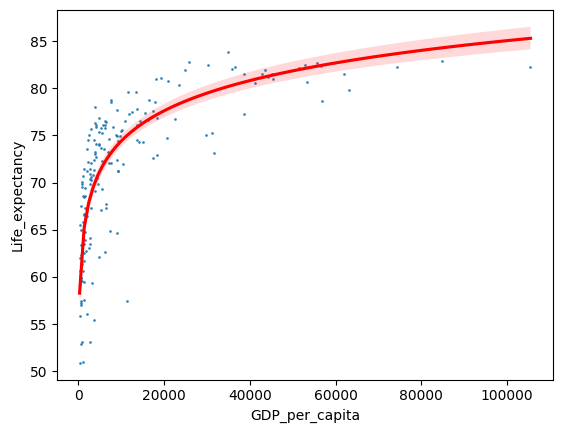

In [28]:
import seaborn
import matplotlib.pyplot as plt

# g = seaborn.regplot(data2015, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})
g = seaborn.regplot(data2015, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"}, logx = True)
# jak dodat popisek = název grafu? Přes label mi to nefungovalo: label = "Life Expectancy 2015"

C:\Users\zitko\AppData\Local\Temp\ipykernel_48112\791352776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2015["Life_expectancy_Zscore"] = numpy.abs(stats.zscore(data2015['Life_expectancy']))


(179, 22)

(179, 22)

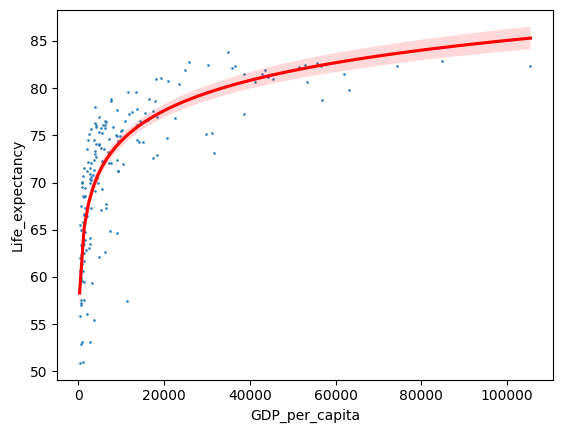

In [34]:
# existují odlehlá pozorování (zejm. v nejvyšších HDP), pomocí Z-scóre odstraňuji tato odlehlá pozorování
from scipy import stats
import numpy

data2015["Life_expectancy_Zscore"] = numpy.abs(stats.zscore(data2015['Life_expectancy']))
data2015_wo_outliers = data2015[data2015["Life_expectancy_Zscore"] < 3]
# g = seaborn.regplot(data, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"})
g = seaborn.regplot(data2015_wo_outliers, x="GDP_per_capita", y="Life_expectancy", scatter_kws={"s": 1}, line_kws={"color":"r"}, logx = True)

display(data2015.shape)  # počet řádků, počet sloupců
display(data2015_wo_outliers.shape  )

# neodstranila se žádná odlehlá pozorování ??

Dále si zobraz tabulku s využitím metody využitím modulu scipy a metody summary() a zjisti koeficient determinace.

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "Life_expectancy ~ GDP_per_capita"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
display(res.summary())

display("Koeficient determinace je R-squared = 0.396, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 40%")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 23 May 2023   Prob (F-statistic):           3.90e-21
Time:                        06:00:26   Log-Likelihood:                -576.78
No. Observations:                 179   AIC:                             1158.
Df Residuals:                     177   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9538      0.561    121.219      0.000      66.848      69.060
GDP_per_capita     0.0003   2.58e-05     10.774      0.000       0.000       0.000
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.349
Skew:                          -0.846   Prob(JB):                     2.31e-05
Kurtosis:                       3.037   Cond. No.                     2.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'Koeficient determinace je R-squared = 0.396, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 40%'

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.000 ... Prob(JB) = 2.31e-05 --> ZAMÍTÁME hypotézu normálního rozdělení reziduí (<0.05).
- Prob(F-statistic) = 3.90e-21 --> Model jako celek je statisticky významný (<0.05).
- R-squared = 0.396 --> Koeficient determinace je R-squared = 0.396, což znamená, že proměnná HDP na hlavu vysvětluje délku života jen ze 40%.
- P>|t|: 0.000 --> Koeficient je statisticky významný, je hodnota <0.05.  (zde je koeficient důležitý, protože jsem nezamítla hypotézu normálního rozdělení)


### nejsem si jistá hodnotou P>|t| - díváme se na 1. řádek hned pod P>|t|?

Do modelu přidej následující sloupce:

- Schooling - průměrná délka studia (v letech),
- Incidents_HIV - nákazy virem HIV (počet případů na osobu)
- Diphtheria - procento populace očkované proti záškrtu,
- Polio - procento populace očkované proti dětské obrně,
- BMI - průměrný BMI index populace,
- Measles - procento populace očkované proti spalničkám.
U každého sloupce se zamysli nad tím, jestli může délku života výrazně ovlivnit a jaké tipuješ znaménko koeficientu (kladné - zvyšuje délku života, záporné - snižuje délku života).

In [42]:
# metoda nejmenších čtverců (OLS)
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Diphtheria + Polio + BMI + Measles"
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.03
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.22e-54
Time:                        06:13:46   Log-Likelihood:                -482.13
No. Observations:                 179   AIC:                             980.3
Df Residuals:                     171   BIC:                             1006.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9443      4.016      9.449      0.000      30.018      45.871
GDP_per_capita     0.0001   1.96e-05      5.565      0.000    7.05e-05       0.000
Schooling          0.8445      0.146      5.791      0.000       0.557       1.132
Incidents_HIV     -1.4128      0.173     -8.154      0.000      -1.755      -1.071
Diphtheria        -0.0035      0.051     -0.067      0.946      -0.105       0.098
Polio              0.1385      0.060      2.304      0.022       0.020       0.257
BMI                0.4254      0.161      2.646      0.009       0.108       0.743
Measles            0.0390      0.023      1.731      0.085      -0.005       0.083
==============================================================================
Omnibus:                        3.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.965
Skew:                          -0.347   Prob(JB):                        0.138
Kurtosis:                       2.774   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.143 ... Prob(JB) = 0.138 --> Nezamítáme hypotézu normálního rozdělení reziduí (>0.05).
- Prob(F-statistic) = 1.22e-54 --> Model jako celek je statisticky významný (<0.05).
- R-squared = 0.79 --> Model na základě nezávislých proměných vysvětluje 79 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká neznámými faktory nebo náhodně).
- P>|t|: 0.000 --> Koeficient je statisticky významný, hodnota je <0.05. 

Pokud jsi nezamítl(a) hypotézu normality, podívej se do sloupce P>|t| a vyber řádek s nejvyšší p-hodnotou. Koeficient pro daný řádek odeber z modelu. Jak se změnila hodnota ostatních koeficientů? Jak se změnil koeficient determinace?

In [44]:
# odebrala jsem proměnnou "Diphtheria", protože má hodnotu P>|t| nejvyšší ze všech (0.946). 
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI + Measles" 
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.12e-55
Time:                        12:17:22   Log-Likelihood:                -482.14
No. Observations:                 179   AIC:                             978.3
Df Residuals:                     172   BIC:                             1001.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.9505      4.003      9.481      0.000      30.049      45.852
GDP_per_capita     0.0001   1.95e-05      5.594      0.000    7.06e-05       0.000
Schooling          0.8455      0.145      5.844      0.000       0.560       1.131
Incidents_HIV     -1.4129      0.173     -8.179      0.000      -1.754      -1.072
Polio              0.1349      0.026      5.106      0.000       0.083       0.187
BMI                0.4260      0.160      2.661      0.009       0.110       0.742
Measles            0.0389      0.022      1.737      0.084      -0.005       0.083
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.993
Skew:                          -0.348   Prob(JB):                        0.136
Kurtosis:                       2.773   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.141 ... Prob(JB) = 0.136 --> Nezamítáme hypotézu normálního rozdělení reziduí (>0.05).
- Prob(F-statistic) = 1.22e-55 --> Model jako celek je statisticky významný (<0.05).
- R-squared = 0.79 --> Model na základě nezávislých proměných vysvětluje 79 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká neznámými faktory nebo náhodně).
- P>|t|: 0.000 --> Koeficient je statisticky významný, hodnota je <0.05. 

Dle mého názoru se odebráním proměnné "Diphtheria" nic nestalo. Znamená to, že očkování proti záškrtu nemá výrazný vliv na průměrnou délku života.

In [45]:
# odebrala jsem dále proměnnou "Measels", protože má hodnotu P>|t| nejvyšší ze všech (0.084). 
formula = "Life_expectancy ~ GDP_per_capita + Schooling + Incidents_HIV + Polio + BMI" 
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     127.5
Date:                Tue, 23 May 2023   Prob (F-statistic):           4.17e-56
Time:                        12:23:29   Log-Likelihood:                -483.69
No. Observations:                 179   AIC:                             979.4
Df Residuals:                     173   BIC:                             998.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         38.0272      4.026      9.445      0.000      30.081      45.974
GDP_per_capita     0.0001   1.96e-05      5.612      0.000    7.14e-05       0.000
Schooling          0.8967      0.142      6.294      0.000       0.615       1.178
Incidents_HIV     -1.4398      0.173     -8.319      0.000      -1.781      -1.098
Polio              0.1528      0.024      6.243      0.000       0.104       0.201
BMI                0.4667      0.159      2.930      0.004       0.152       0.781
==============================================================================
Omnibus:                        3.078   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                3.138
Skew:                          -0.303   Prob(JB):                        0.208
Kurtosis:                       2.767   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.215 ... Prob(JB) = 0.208 --> Nezamítáme hypotézu normálního rozdělení reziduí (>0.05). Hodnoty se lehce zvýšili oproti předchozímu regresnímu modelu s očkování proti spalničkám.
- Prob(F-statistic) = 4.17e-56 --> Model jako celek je statisticky významný (<0.05). Hodnoty se snížila oproti předchozímu regresnímu modelu s očkování proti spalničkám.
- R-squared = 0.787 --> Model na základě nezávislých proměných vysvětluje 78,7 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká neznámými faktory nebo náhodně). Lehce se tedy snížilo % vysvětlení závislé proměnné.
- P>|t|: 0.000 --> Koeficient je statisticky významný, hodnota je <0.05. 

Dle mého názoru se odebráním proměnné "Measles" lehce snížilo % vysvětlění závislé proměnné, ale stále se jedná o model statisticky významný, nezamítáme hypotézu normálního rozdělení riziduí. Znamená to, že očkování spalničkám má lehký/velice mírný vliv na průměrnou délku života.

In [48]:
# odebrala jsem dále proměnnou "Schooling" zkušebně
formula = "Life_expectancy ~ GDP_per_capita + Incidents_HIV + Polio + BMI" 
mod = smf.ols(formula=formula, data=data2015)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     122.3
Date:                Tue, 23 May 2023   Prob (F-statistic):           1.78e-49
Time:                        12:31:33   Log-Likelihood:                -502.15
No. Observations:                 179   AIC:                             1014.
Df Residuals:                     174   BIC:                             1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         26.1200      3.928      6.649      0.000      18.367      33.873
GDP_per_capita     0.0002   1.86e-05      9.323      0.000       0.000       0.000
Incidents_HIV     -1.4849      0.191     -7.769      0.000      -1.862      -1.108
Polio              0.2074      0.025      8.200      0.000       0.157       0.257
BMI                1.0063      0.148      6.780      0.000       0.713       1.299
==============================================================================
Omnibus:                        4.359   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                4.421
Skew:                          -0.377   Prob(JB):                        0.110
Kurtosis:                       2.843   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Kvalita a parametry modelu:
- Prob(Omnibus) = 0.113 ... Prob(JB) = 0.110 --> Nezamítáme hypotézu normálního rozdělení reziduí (>0.05).
- Prob(F-statistic) = 1.78e-49 --> Model jako celek je statisticky významný (<0.05). 
- R-squared = 0.738 --> Model na základě nezávislých proměných vysvětluje 74 % rozptylu závislé proměnné = průměrné délky života (zbytek vzniká neznámými faktory nebo náhodně). Snížilo % vysvětlení závislé proměnné. Průměrná délka studia tedy má vliv na průměrnou déku života a to konkrétně 5% (79%-74% = 5%)
- P>|t|: 0.000 --> Koeficient je statisticky významný, hodnota je <0.05. 

Dle mého názoru se odebráním proměnné "Schooling" snížilo % vysvětlění závislé proměnné o 5%, model je stále statisticky významný, nezamítáme hypotézu normálního rozdělení riziduí. Znamená to, že průměrná délka studia má vliv na průměrnou délku života ve výši 5%.

### Test normality dat:
Mnoho statistických testů vyžaduje normalitu dat, tj. to, že data mají normální rozdělení. Pro provedení testu použijeme funkci shapiro z modulu scipy.
- zkouším navíc

In [49]:

res = stats.shapiro(data2015["Life_expectancy"])
print(res)

ShapiroResult(statistic=0.9528260231018066, pvalue=1.0978403224726208e-05)


Data tedy nemají normální rozdělení (P-value = 1.0978403224726208e-05   --> tzn. menší než 0.05), což znamená, že na ně nemůžeme použít parametrické testy.
Jak to ale, že podle Prob(Omnibus) vždy nezamítáme hypotézu normálního rozdělení, ale přitom data podle testu Shapiro normální rozdělení nemají? Vyplývá to i z grafu, který je spíče logaritmický???